In [ ]:
#목표 : 경쟁사 고객 리뷰 분석을 통한 소비자 인식 조사
#문제 정의 : 영양제 브랜드 자사와 경쟁사의 구매후기를 크롤링하여, 텍스트 마이닝을 통해 워드클라우드로 소비자 인식을 살펴본다. 
#결론 :  센트롬의 주요 토픽은 직구, 여성-임신, 선물, 피부관리 등으로 크게 나누어 볼수 있었고, 세노비스의 주요 토픽은 어린이, 유산균, 뷰티, 여성, 남편 등으로 살펴볼수 있었다.
#다음과 같은 결과를 LDA토픽모델링을 토해 텍스트에서 토픽/주제를 찾을 수 있었다. 


In [23]:
from konlpy.tag import Hannanum
from konlpy.tag import Twitter 
from konlpy.tag  import Kkma

hannanum =Hannanum()
twitter =Twitter()
kkma = Kkma()

In [24]:
# 인코딩된 파일 읽어드릴때(TXT 파일 read 오류 발생) ,
# 에러 발생시에 f = open('test.txt', 'rt' , encoding = 'UTF8') 에러 해결.

#형태소분석 - kkma명사
line_list = []
f =open("C:/Users/hongm/Downloads/centrum_review.txt", "rt", encoding ="UTF8")

for line in f:
    line = kkma.nouns(line)
    line_list.append(line)
f.close()
    
    
print("-불러온 문서:", len(line_list), "문장")

-불러온 문서: 102 문장


In [25]:
line_list[10]

['플라스틱', '포장', '과대', '과대포장', '상품', '상품자체', '자체', '투명']

In [32]:
word_frequency = {}
noun_list =[]
#불용어 리스트 추가
stop_list = ["배송", "만족","구매","제품", "번째"]
line_number = 0
for line in line_list[:]:
    line_number += 1
    print(str(line_number) + "/" + str(len(line_list)), end="\r")
    noun = []
    for word in line:
        if word.split("/")[0] not in stop_list and len(word.split("/")[0]) > 1:  
            noun.append(word.split("/")[0])
            if word not in word_frequency.keys():
                word_frequency[word] = 1
            else:
                word_frequency[word] += 1
    noun_list.extend(noun)

In [33]:
#단어별 출현빈도 출력
word_count = []
for n, freq in word_frequency.items():
    word_count.append([n, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)
for n, freq in word_count[:10]:
    print(n + "\t" + str(freq))

감사	9
비타민	7
추천	5
건강	4
가격	4
적극	3
피곤	3
이용	3
포장	3
효과	3


In [34]:
#추출한 명사 리스트를 활용해 명사만으로 이루어진 문서를 생성
noun_doc = ' '.join(noun_list)
noun_doc = noun_doc.strip()

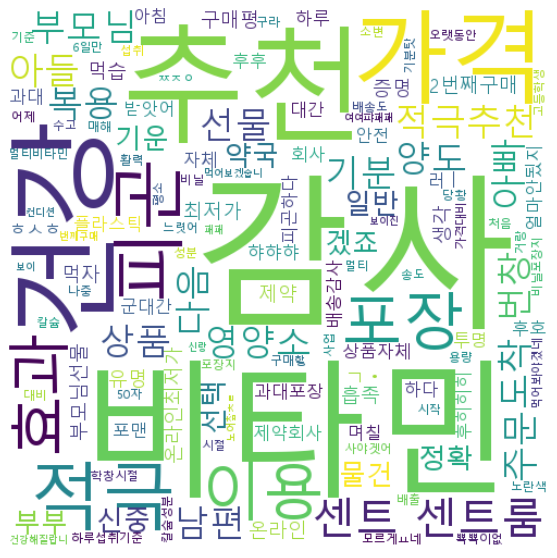

In [35]:
# 워드클라우드 파라미터 설정
#폰트 설정 주의! 
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

font_path="G:/workpy/zoom/malgun.ttf"  #폰트
background_color="white"      #배경색
margin=3                     #모서리 여백 넓이
min_font_size=7              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin, \
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_doc)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
 

line_list = []
f =open("C:/Users/hongm/Downloads/centrum2.txt", "rt", encoding ="UTF8")

for line in f:
    line = kkma.nouns(line)
    line_list.append(line)
f.close()
    
    
print("-불러온 문서:", len(line_list), "문장")

-불러온 문서: 2000 문장


In [37]:
word_frequency = {}
noun_list = []
#불용어 리스트
stop_list = ["배송", "만족", "카페", "카페규정", "확인", "주수", "센트"]
line_number = 0
for line in line_list[:]:
    line_number += 1
    print(str(line_number) + "/" + str(len(line_list)), end="\r")
    noun = []
    for word in line:
        if word.split("/")[0] not in stop_list and len(word.split("/")[0]) > 1:  
            noun.append(word.split("/")[0])
            if word not in word_frequency.keys():
                word_frequency[word] = 1
            else:
                word_frequency[word] += 1
    noun_list.extend(noun)

1117/2000

In [38]:
#단어별 출현빈도를 출력
word_count = []
for n, freq in word_frequency.items():
    word_count.append([n, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)
for n, freq in word_count[:10]:
    print(n + "\t" + str(freq))

센트룸	1841
비타민	786
임신	344
영양제	342
종합	310
엽산	250
추천	246
철분	221
종합비타민	199
보건소	196


In [39]:
#추출한 명사 리스트를 활용해 명사만으로 이뤄진 문서 생성
noun_doc = ' '.join(noun_list)
noun_doc = noun_doc.strip()



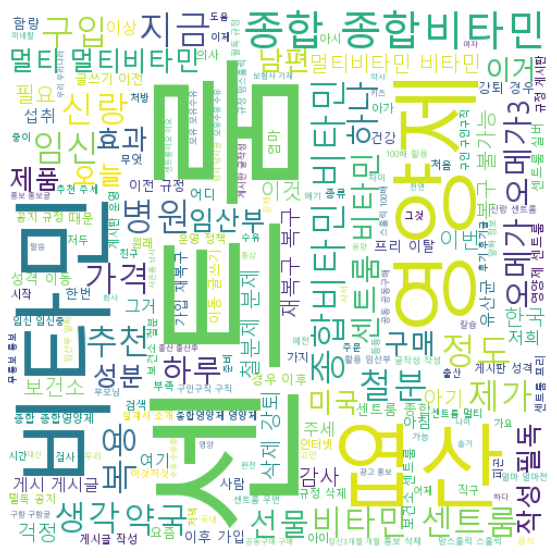

In [40]:
font_path="G:/workpy/zoom/malgun.ttf"  #폰트
background_color="white"      #배경색
margin=3                     #모서리 여백 넓이
min_font_size=7              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin, \
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_doc)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [46]:
#LDA 토픽 모델링 (토픽수와 키워드 수를 미리 정해둠. 모델을 돌릴때마다 결과가 달라짐 )
import gensim
from gensim import corpora
import logging
logging.basicConfig(level=logging.DEBUG)
topic = 5
keyword = 10
texts = []
resultList = []
stop_list = ["배송", "만족", "카페", "카페규정", "확인", "주수", "센트"]
for line in line_list:
    words = line
    if words != [""]:
        tokens = [word for word in words if (len(word.split("/")[0]) > 1 and word.split("/")[0] not in stop_list)]
        texts.append(tokens)
dictionary = corpora.Dictionary(texts)    
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word = dictionary, passes=10)
for num in range(topic):
    resultList.append(ldamodel.show_topic(num, keyword))

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(10095 unique tokens: ['16', '16주', '3개월분', '3일', '개월']...) from 2000 documents (total 46593 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 5 topics, 10 passes over the supplied corpus of 2000 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 50x with a convergence threshold of 0.001000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-10.584 per-word bound, 1534.7 perplexity estimate based on a held-out corpus of 2000 documents with 46593 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/2000
DEBUG:gensim.models.ldamodel:performing inf

DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.035*"센트룸" + 0.013*"비타민" + 0.010*"임신" + 0.010*"철분" + 0.008*"보건소" + 0.008*"영양제" + 0.007*"엽산" + 0.006*"개월" + 0.005*"종합" + 0.005*"복용"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.060*"센트룸" + 0.020*"비타민" + 0.011*"종합" + 0.008*"종합비타민" + 0.007*"실버" + 0.007*"영양제" + 0.006*"가격" + 0.006*"신랑" + 0.006*"구매" + 0.006*"엽산"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.033*"센트룸" + 0.011*"비타민" + 0.008*"임신" + 0.006*"영양제" + 0.006*"종합" + 0.005*"추천" + 0.005*"엽산" + 0.005*"종합비타민" + 0.005*"신랑" + 0.005*"지금"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.013*"센트룸" + 0.006*"비타민" + 0.005*"수유" + 0.004*"영양제" + 0.004*"임신" + 0.004*"주세" + 0.003*"철분" + 0.003*"판매" + 0.003*"후기" + 0.003*"임산부"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.022*"센트룸" + 0.017*"비타민" + 0.006*"게시판" + 0.006*"규정" + 0.006*"작성" + 0.006*"28123090" + 0.005*"필독" + 0.005*"임신" + 0.005*"추천" + 0.004*"영양제"
INFO:gensim.models.ldamodel:topic diff=0.104153, rho=0.

In [47]:
resultList

[[('센트룸', 0.036127828),
  ('비타민', 0.013987763),
  ('임신', 0.01145168),
  ('철분', 0.010900908),
  ('보건소', 0.009511273),
  ('영양제', 0.009061798),
  ('엽산', 0.0074646706),
  ('종합', 0.0060991836),
  ('개월', 0.0060748416),
  ('복용', 0.0057958653)],
 [('센트룸', 0.060609467),
  ('비타민', 0.021305162),
  ('종합', 0.01133747),
  ('종합비타민', 0.008173712),
  ('실버', 0.0074636596),
  ('영양제', 0.0067797382),
  ('가격', 0.0063558905),
  ('구매', 0.006169423),
  ('추천', 0.00582492),
  ('신랑', 0.005716912)],
 [('센트룸', 0.033219144),
  ('비타민', 0.011181351),
  ('임신', 0.008005921),
  ('영양제', 0.006216457),
  ('종합', 0.0057317507),
  ('추천', 0.005219482),
  ('엽산', 0.0050584013),
  ('종합비타민', 0.00482172),
  ('신랑', 0.0047698654),
  ('지금', 0.0047132317)],
 [('센트룸', 0.010259769),
  ('수유', 0.005323367),
  ('비타민', 0.004402584),
  ('주세', 0.004130408),
  ('영양제', 0.0035313324),
  ('판매', 0.0034401868),
  ('후기', 0.003291731),
  ('임신', 0.0032247095),
  ('광고', 0.003148431),
  ('해당', 0.00297486)],
 [('센트룸', 0.021180345),
  ('비타민', 0.016586948),


In [ ]:
#분석결과를 다이어그램으로 나타내면 더욱 효과적으로 시각화 할 수 있다. 
#센트롬의 인사이트로는 해외 직구로 저럼하게 구매하는 사람이 많았고, 임산부가 많이 먹는 , 선물로 좋은 영양제라는 소비자 인식 결과를 얻을 수 있었다. 
# 세노비스의 경우는 어린이들이 맛있게 먹는 키즈라인, 변비 수퍼바이어틱스, 안티에이징 프로폴리스, 다이어트에는 팻번, 생리통, 아토피, 월경전 증후군에 효과가 좋다는 소비자 인식 결과를 얻었다. 
